This project is about the prediction of the capability of applicants to repay a loan. The dataset contains following files:
    
    - Train/Test data
    - Bureau
    - Bureau balance
    - Credit card balance
    - Installments payments
    - POS_CASH balance
    - Previous application
    
For expoloratory data analysis, we will be mainly focusing on the training data.

In [1]:
# Import libraries
import os

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load and take a look at training data
traindata = pd.read_csv('D:/Python/Incubator_challenge/Home credit default risk/application_train.csv')
print('Training data shape: ', traindata.shape)
traindata.head(5)

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Then the test data
testdata = pd.read_csv('D:/Python/Incubator_challenge/Home credit default risk/application_test.csv')
print('Testing data shape: ', testdata.shape)

Testing data shape:  (48744, 121)


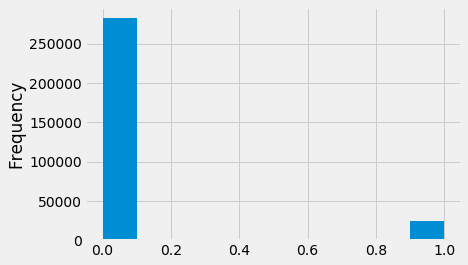

In [11]:
# Let's take a look at the distribution of the target column. We can see that this is an imbalanced class problem.

traindata['TARGET'].astype(int).plot.hist();

In [16]:
# checking missing data
missing_values = traindata.isnull().sum().sort_values(ascending = False)
percentage = (traindata.isnull().sum()/traindata.isnull().count()*100).sort_values(ascending = False)
missing_traindata  = pd.concat([missing_values, percentage], axis=1, keys=['missing_values', 'percentage'])
missing_traindata.head(20)

,missing_values,percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [63]:
# Start exploratory data analysis

def plot_function(feature,label_rotation=False):

    targetpercent = traindata[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    targetpercent.sort_values(by='TARGET', ascending=False, inplace=True)
        
    plt.figure(figsize=[12,5])   
    s = sns.barplot( x = feature, y='TARGET', order=targetpercent[feature], data=targetpercent)   
    
    s.set_xticklabels(s.get_xticklabels(),rotation=90)  
    plt.ylabel('Percent of target with value 1', fontsize=10)
    plt.xlabel('Occupation type', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show();

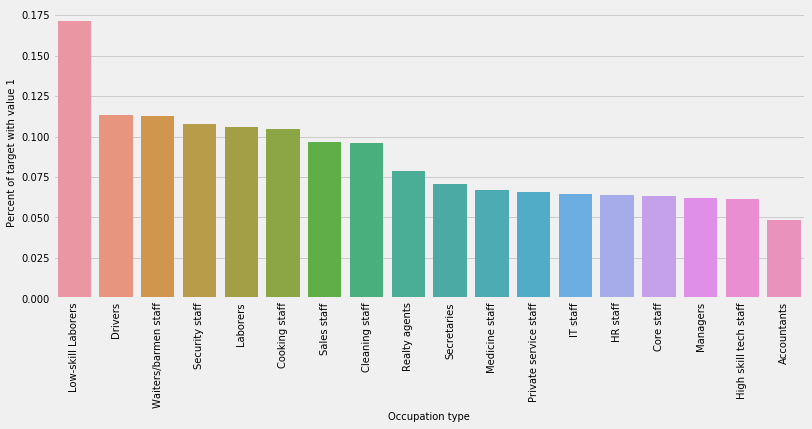

In [64]:
# Start exploratory data analysis from the occupation of the applicants

plot_function('OCCUPATION_TYPE')